In [33]:
% matplotlib inline

In [87]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_palette("dark", 6)

In [35]:
def integrate_norm(mu, s, y):
  z_score = (y - mu) / s
  ncdf = sp.stats.norm(mu, s).cdf(y)
  npdf = sp.stats.norm(mu, s).pdf(y)
  return s * (z_score * ncdf ** 2 + 2 * ncdf * npdf * s -
              1. / np.sqrt(np.pi) * sp.stats.norm(mu, s / np.sqrt(2)).cdf(y))

In [36]:
def crps_norm(mu, s, y):
  left = integrate_norm(mu, s, y)
  right = integrate_norm(-mu, s, -y)
  return left + right

In [46]:
def mle_norm(mu, s, y):
  return -np.log(sp.stats.norm(mu, s).pdf(y))

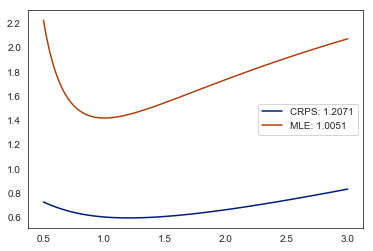

In [123]:
s = np.linspace(0.5, 3, 100)
y = 1
plt.plot(s, crps_norm(0, s, y), label="CRPS: %.4f" % s[np.argmin(crps_norm(0, s, y))])
plt.plot(s, mle_norm(0, s, y), label="MLE: %.4f" % s[np.argmin(mle_norm(0, s, y))])
plt.legend()